<hr style="border-width:4px; border-style:solid; border-color:coral"></hr>

# MPI_Gather

<hr style="border-width:4px; border-style:solid; border-color:coral"></hr>

The function `P

In [1]:
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
%%bash

# Usage :  
#
#    $ gather <N> <gather_choice>
#
# where <N> is the number of mesh cells and <gather_choice> is 0 to use 'gather' and 
# 1 to use 'gatherv'

mpicc -o gather gather_bug.c
mpirun -n 4 gather 32 1

In [3]:
# Open file for reading; use binary mode
fout = open("gather.out","rb")

# Read meta data
dt_meta = dtype([('N','int32'),('a','d'),('b','d'),('gather_choice','int32')])
d = fromfile(fout,dtype=dt_meta, count=1)[0]

# create dictionary containing meta data
parms = dict(zip(dt_meta.fields,d))

# Print meta data from dictionary
print("N = {N:d}\na = {a:g}\nb = {b:g}\nGather choice = {gather_choice:d}".format(**parms))

# Assign values in tuple directly (for use below)
N,a,b,gather_choice = d

# Read solution data
dt_q = dtype([('q','d',N+1)])  
data = fromfile(fout,dtype=dt_q)

# Close file
fout.close()

N = 32
a = 0
b = 1
Gather choice = 1


<IPython.core.display.Javascript object>


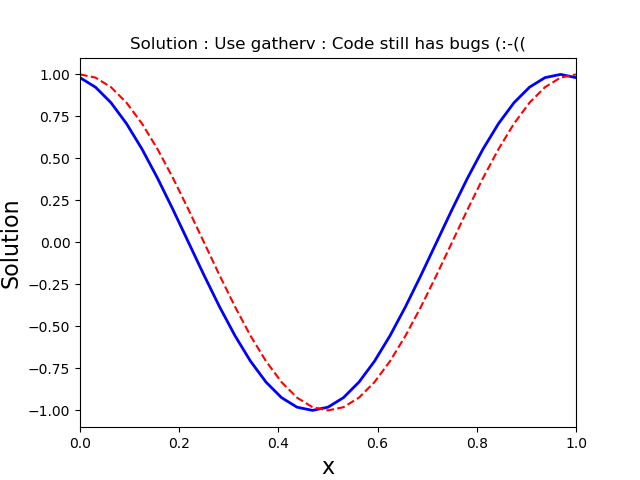

In [4]:
fig = figure(1)
clf()

q = data[0][0]

x = linspace(a,b,N+1)

err = abs(q-cos(2*pi*x)).max()

if abs(err) < 1e-15:
    estr = 'You found all the bugs (:)))'
else:
    estr = 'Code still has bugs (:-(('


if gather_choice:
    gstr = 'Use gatherv'
else:
    gstr = 'Use gather'

htitle = title('Solution : {:s} : {:s}'.format(gstr,estr) )

plot(x,q,linewidth=2,color='b')
plot(x,cos(2*pi*x),'r--')

xlabel('x',fontsize=16)
ylabel('Solution',fontsize=16)
xlim([a,b])

fig.canvas.draw()  